# Algorytmy genetyczne - problem Komiwojażera

### Import bibliotek

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.spatial import distance
from scipy.spatial import distance_matrix

In [2]:
def generate_cities(n, area_size):
    return pd.DataFrame({"X": np.random.randint(area_size, size=n), "Y": np.random.randint(area_size, size=n)})

(0.0, 210.0)

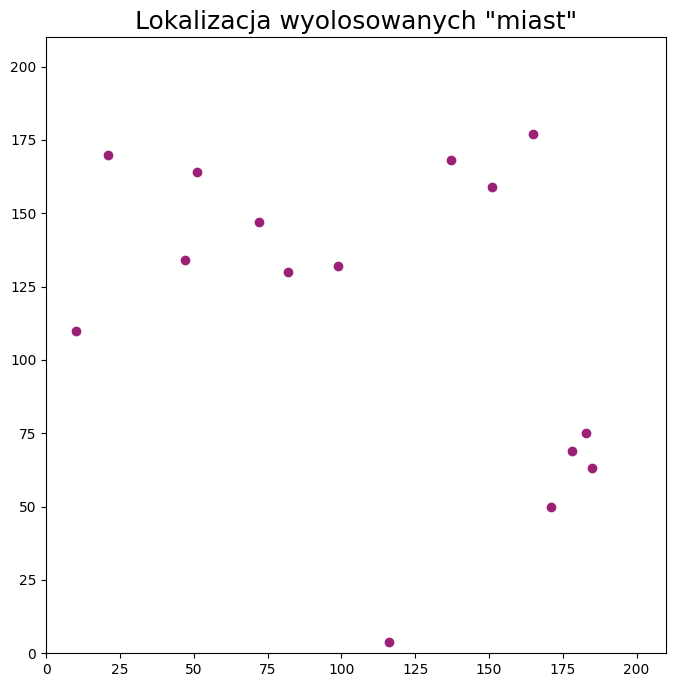

In [3]:
cities = generate_cities(15, 200)
plt.figure(figsize = (8,8))
plt.scatter(cities.X, cities.Y, color="#9B2177")
plt.title('Lokalizacja wyolosowanych "miast"', fontsize=18)
plt.xlim(0,210)
plt.ylim(0,210)

### Przedstawienie koordynatów

In [4]:
display(cities.T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
X,183,165,47,137,178,99,151,51,116,10,72,21,82,185,171
Y,75,177,134,168,69,132,159,164,4,110,147,170,130,63,50


### Macierz dystansu

In [5]:
def distances(cities):
    return pd.DataFrame(distance_matrix(cities.values, cities.values), index=cities.index, columns=cities.index)

dist = distances(cities)
display(dist)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.000000,103.576059,148.246416,103.754518,7.810250,101.513546,89.888820,159.201131,97.621719,176.504957,132.306462,187.800426,115.004348,12.165525,27.730849
1,103.576059,0.000000,125.590605,29.410882,108.779594,79.881162,22.803509,114.738834,179.805450,168.860889,97.718985,144.170038,95.383437,115.741090,127.141653
2,148.246416,125.590605,0.000000,96.208108,146.239530,52.038447,106.962610,30.265492,147.176764,44.102154,28.178006,44.407207,35.227830,155.193428,149.773162
3,103.754518,29.410882,96.208108,0.000000,107.154095,52.345009,16.643317,86.092973,165.339046,139.617334,68.308125,116.017240,66.850580,115.451288,122.800651
4,7.810250,108.779594,146.239530,107.154095,0.000000,101.044545,93.962759,158.600126,89.827613,172.930622,131.605471,186.681547,113.740934,9.219544,20.248457
5,101.513546,79.881162,52.038447,52.345009,101.044545,0.000000,58.591808,57.688820,129.123971,91.678787,30.886890,86.764048,17.117243,110.258786,109.123783
6,89.888820,22.803509,106.962610,16.643317,93.962759,58.591808,0.000000,100.124922,158.902486,149.271565,79.906195,130.464555,74.846510,101.843016,110.819673
7,159.201131,114.738834,30.265492,86.092973,158.600126,57.688820,100.124922,0.000000,172.699160,67.801180,27.018512,30.594117,46.010868,167.800477,165.517371
8,97.621719,179.805450,147.176764,165.339046,89.827613,129.123971,158.902486,172.699160,0.000000,149.906638,149.616176,191.261601,130.506705,90.785461,71.700767
9,176.504957,168.860889,44.102154,139.617334,172.930622,91.678787,149.271565,67.801180,149.906638,0.000000,72.201108,61.000000,74.726167,181.201545,171.816763


### Wybór populacji początkowej

In [6]:
def genesis(cities, n_population):
    n_cities = len(cities)
    population_set = []
    for i in range(n_population):
        city = np.random.permutation(cities)
        population_set.append(city)
    population_df = pd.DataFrame(population_set, columns=['City_' + str(i) for i in range(1, n_cities + 1)])
    return population_df

population = genesis(cities.index, 10)
display(population)

,City_1,City_2,City_3,City_4,City_5,City_6,City_7,City_8,City_9,City_10,City_11,City_12,City_13,City_14,City_15
0,10,14,1,6,9,4,13,2,11,7,12,5,0,8,3
1,11,13,9,6,12,7,2,8,0,5,3,14,1,10,4
2,12,5,11,13,2,9,1,0,6,7,10,3,8,4,14
3,11,14,5,1,8,2,10,12,0,9,13,4,3,7,6
4,4,11,0,3,8,6,1,2,10,13,9,14,7,5,12
5,7,5,13,8,9,2,12,11,3,6,1,4,14,10,0
6,6,13,14,7,2,9,8,0,1,3,12,10,4,11,5
7,13,5,3,6,0,7,12,10,1,11,4,14,8,2,9
8,7,5,8,12,4,3,0,13,9,6,2,1,11,14,10
9,14,8,5,1,7,4,9,11,12,2,0,10,6,13,3


### Ocena populacjii

In [7]:
def compute_fitness(population_df, distance_matrix):
    fitness_values = []
    for idx, solution in population_df.iterrows():
        solution_distance = 0
        for i in range(len(solution) - 1):
            city1 = solution.iloc[i]
            city2 = solution.iloc[i + 1]
            solution_distance += distance_matrix.loc[city1, city2]
        first_city = solution.iloc[0]
        last_city = solution.iloc[len(solution) - 1]
        solution_distance += distance_matrix.loc[last_city, first_city]
        fitness_values.append(solution_distance)
    population_df["Fitness"] = fitness_values
    return fitness_values, population_df

In [8]:
fitness, population = compute_fitness(population, dist)
display(population)

,City_1,City_2,City_3,City_4,City_5,City_6,City_7,City_8,City_9,City_10,City_11,City_12,City_13,City_14,City_15,Fitness
0,10,14,1,6,9,4,13,2,11,7,12,5,0,8,3,1346.072335
1,11,13,9,6,12,7,2,8,0,5,3,14,1,10,4,1742.020120
2,12,5,11,13,2,9,1,0,6,7,10,3,8,4,14,1451.858490
3,11,14,5,1,8,2,10,12,0,9,13,4,3,7,6,1661.748914
4,4,11,0,3,8,6,1,2,10,13,9,14,7,5,12,1826.934095
5,7,5,13,8,9,2,12,11,3,6,1,4,14,10,0,1275.514728
6,6,13,14,7,2,9,8,0,1,3,12,10,4,11,5,1291.564841
7,13,5,3,6,0,7,12,10,1,11,4,14,8,2,9,1387.071273
8,7,5,8,12,4,3,0,13,9,6,2,1,11,14,10,1719.043315
9,14,8,5,1,7,4,9,11,12,2,0,10,6,13,3,1596.702527


### Najlepsza trasa w danym pokoleniu
#### Funkcja do wizualizacji

In [11]:
def best_route(population_df, cities_df):
    index = population_df["Fitness"].idxmin()
    route = population_df.iloc[index, :-1].values
    plt.figure(figsize=(6, 6))
    plt.plot(cities_df.loc[route, "X"], cities_df.loc[route, "Y"], color="#efaffa")
    plt.scatter(cities_df["X"], cities_df["Y"], color="#8f00a8")
    plt.xlim(0, 210)
    plt.ylim(0, 210)
    plt.title("Najlepsza droga w obecnej populacji")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)

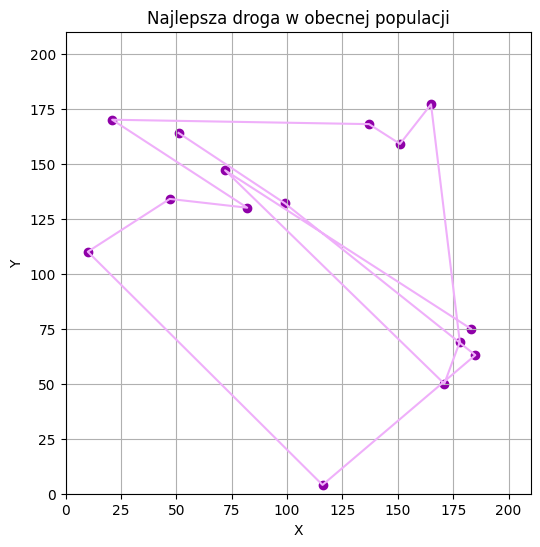

In [12]:
best_route(population, cities)

### Selekcja

In [ ]:
def selection